In [70]:
import pandas as pd
import numpy as np
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm

In [71]:
train=pd.read_csv("C:/Users/choi/Downloads/programmers-dev-wine/train.csv", index_col='Index')
test=pd.read_csv("C:/Users/choi/Downloads/programmers-dev-wine/test.csv", index_col='Index')
sample_submission=pd.read_csv("C:/Users/choi/Downloads/programmers-dev-wine/sample_submission.csv", index_col='Index')

In [72]:
print(train.shape, test.shape, submission.shape)

(451, 13) (49, 13) (49, 1)


In [73]:
train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
Index,,,,,,,,,,,,,
50,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white
51,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white
52,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white
53,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white
54,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white


In [74]:
test.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Unnamed: 13
Index,,,,,,,,,,,,,
1,5.9,0.645,0.12,2.0,0.075,32,44,0.99547,3.57,0.71,10.2,5,NaN
2,6.0,0.310,0.47,3.6,0.067,18,42,0.99549,3.39,0.66,11.0,6,NaN
3,5.5,0.290,0.30,1.1,0.022,20,110,0.98869,3.34,0.38,12.8,7,NaN
4,6.0,0.210,0.38,0.8,0.020,22,98,0.98941,3.26,0.32,11.8,6,NaN
5,6.3,0.510,0.13,2.3,0.076,29,40,0.99574,3.42,0.75,11.0,6,NaN


In [75]:
#type이 train data에만 있음
#애초에 와인분류 문제임

type
red      234
white    217
Name: count, dtype: int64

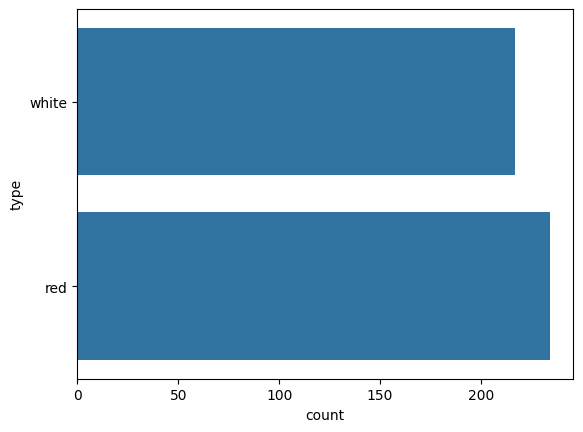

In [76]:
sns.countplot(train['type'])
train['type'].value_counts()

In [77]:
#결측치 확인
print(train.isnull().sum())

print(test.isnull().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
type                    0
dtype: int64
fixed acidity            0
volatile acidity         0
citric acid              0
residual sugar           0
chlorides                0
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       0
sulphates                0
alcohol                  0
quality                  0
Unnamed: 13             49
dtype: int64


In [78]:
#Excel file을 열람해봤을 때 Unnamed는 일반적으로 생기는 오류로 보인다.
# Unnamed: 0 컬럼을 drop하여 제거
test.drop(['Unnamed: 13'], axis = 1, inplace = True)

In [79]:
test.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
Index,,,,,,,,,,,,
1,5.9,0.645,0.12,2.0,0.075,32,44,0.99547,3.57,0.71,10.2,5
2,6.0,0.310,0.47,3.6,0.067,18,42,0.99549,3.39,0.66,11.0,6
3,5.5,0.290,0.30,1.1,0.022,20,110,0.98869,3.34,0.38,12.8,7
4,6.0,0.210,0.38,0.8,0.020,22,98,0.98941,3.26,0.32,11.8,6
5,6.3,0.510,0.13,2.3,0.076,29,40,0.99574,3.42,0.75,11.0,6


<Axes: xlabel='fixed acidity', ylabel='count'>

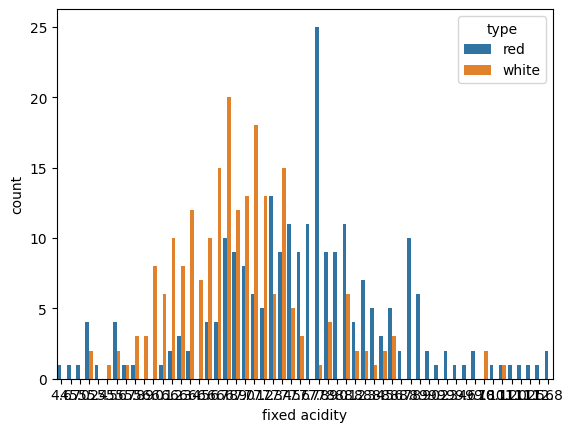

In [42]:
#와인에 대한 지식이 없어 일단 전부 확인
#산도별 종류 확인
sns.countplot(data=train, x='fixed acidity', hue='type')

<Axes: xlabel='volatile acidity', ylabel='count'>

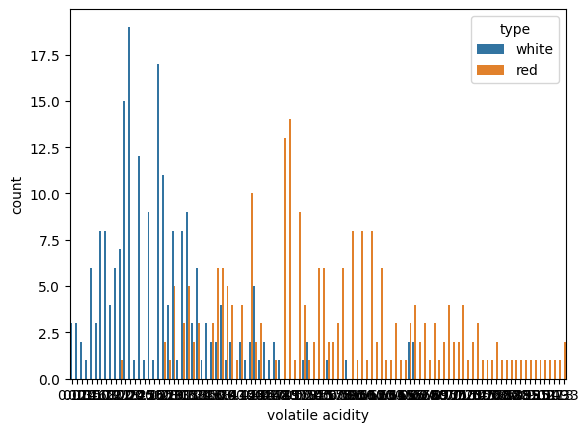

In [43]:
#산도는 와인 종류 분류에 불필요하다 판단
#휘발성산
sns.countplot(data=train, x='volatile acidity', hue='type')

<Axes: xlabel='citric acid', ylabel='count'>

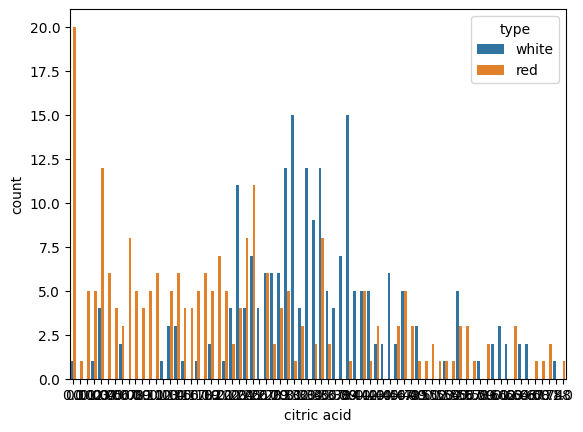

In [44]:
#휘발성산o
#시트르산
sns.countplot(data=train, x='citric acid', hue='type')

<Axes: xlabel='residual sugar', ylabel='count'>

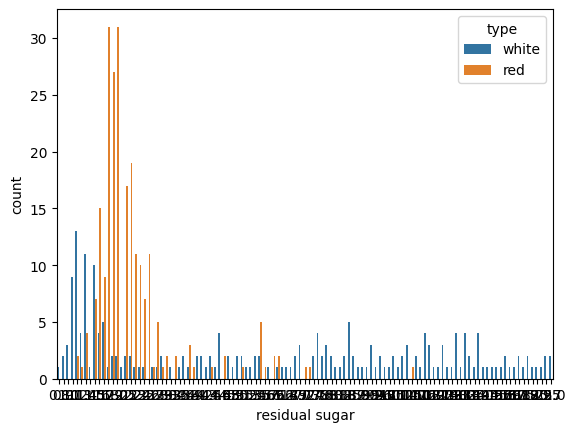

In [47]:
#시트르산 보류
#잔당
sns.countplot(data=train, x='residual sugar', hue='type')

<Axes: xlabel='chlorides', ylabel='count'>

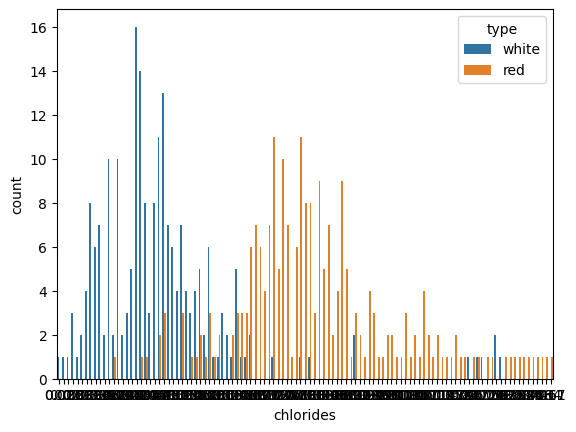

In [48]:
#잔당o red와인 범
#염화물
sns.countplot(data=train, x='chlorides', hue='type')

<Axes: xlabel='free sulfur dioxide', ylabel='count'>

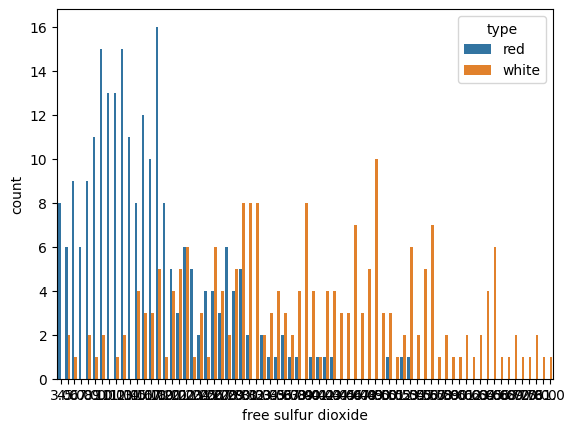

In [50]:
#염화물o
#독립 이산화황
sns.countplot(data=train, x='free sulfur dioxide', hue='type')

<Axes: xlabel='density', ylabel='count'>

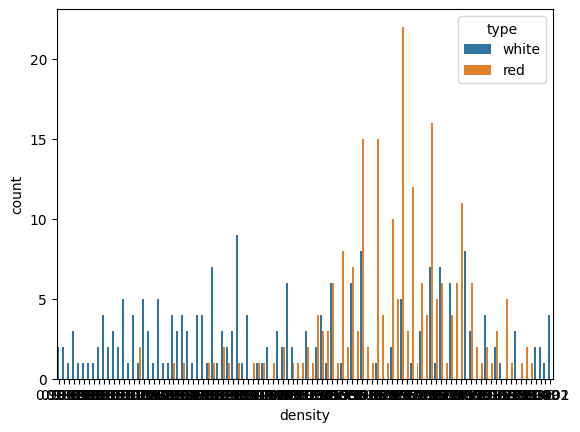

In [51]:
#독립 이산화황o
#밀도
sns.countplot(data=train, x='density', hue='type')

<Axes: xlabel='pH', ylabel='count'>

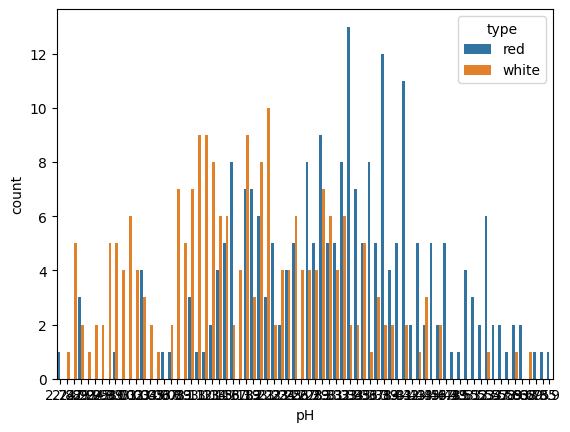

In [52]:
#밀도o
#ph
sns.countplot(data=train, x='pH', hue='type')

<Axes: xlabel='sulphates', ylabel='count'>

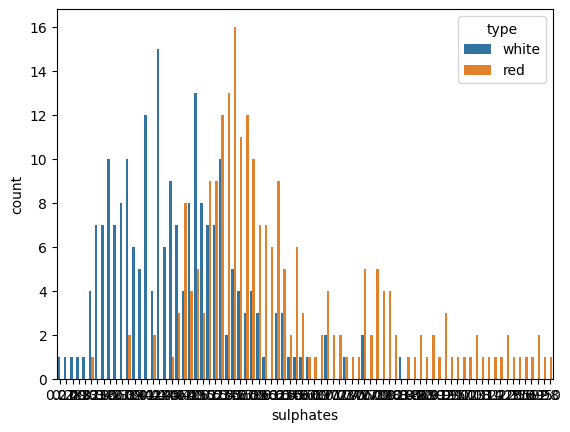

In [53]:
#ph x
#황산염
sns.countplot(data=train, x='sulphates', hue='type')

<Axes: xlabel='alcohol', ylabel='count'>

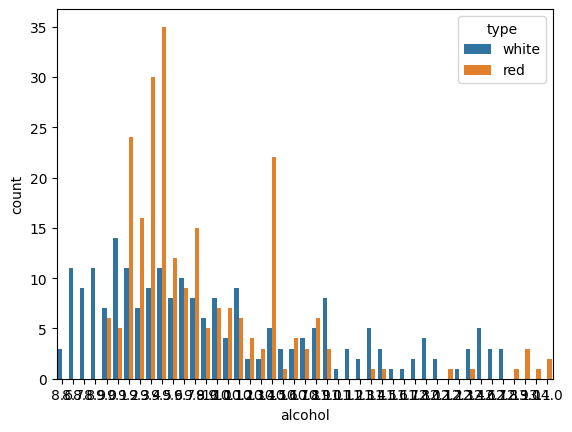

In [54]:
#황산염 o
#도수
sns.countplot(data=train, x='alcohol', hue='type')

In [101]:
X = train.drop(['type','type_encoded'], axis=1)
y = train['type']

#훈련 데이터와 검증 데이터로 분할
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

#모델 선택 및 학습
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

prediction = model.predict(test)

#검증 데이터로 모델 평가
y_pred = model.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)

print(f'Validation Accuracy: {accuracy:.4f}')

Validation Accuracy: 0.9780


In [99]:
print("Train features:", X_train.columns)
print("Test features:", test.columns)

Train features: Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'type_encoded'],
      dtype='object')
Test features: Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


In [100]:
train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type,type_encoded
Index,,,,,,,,,,,,,,
50,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white,1
51,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white,1
52,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white,1
53,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white,1
54,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white,1


In [103]:
# 제출에 Submission 파일 불러오기
submission = pd.read_csv('C:/Users/choi/Downloads/programmers-dev-wine/sample_submission.csv')
 
# 예측값 업데이트
submission['type'] = prediction
 
# CSV 파일로 제작
submission.to_csv('wine_submission.csv', index=False)